# Load libraries

In [2]:
from data_utils import load_data
from model_utils import model_pipeline,plot_history
import numpy as np
from middle_model import cnn_normal,build_cnn_banet_model_middle_fusion,build_lstm_banet_model_middle_fusion

# Define participant number

In [3]:
train_participant_num = ["C56D","C93D","C382D","C382N","C544D","C709N","C788N","P113D","P113N","P191D","P191N","P299D","P299N","P300D","P336D","P492D","P492N","P531N","P699D","P699N","P890N","P921D","P921N"]
valid_participant_num = ["C67D","C202D","C202N","C256D","C256N","P54D","P54N","P342D","P342N","P487D","P487N","P649N"]

# Load coordinate data

In [4]:
X_train, y_train = load_data(train_participant_num, 'train', downsampling=True,angle_energy=False,augment=False)
X_valid, y_valid = load_data(valid_participant_num, 'validation')

C56D is not selected to be used for training (downsampling)
C93D is not selected to be used for training (downsampling)
C382D is not selected to be used for training (downsampling)
C382N is not selected to be used for training (downsampling)
C544D is not selected to be used for training (downsampling)
C709N is not selected to be used for training (downsampling)
C788N is not selected to be used for training (downsampling)
P113D is selected to be used for training (downsampling)
P113N is selected to be used for training (downsampling)
P191D is selected to be used for training (downsampling)
P191N is selected to be used for training (downsampling)
P299D is selected to be used for training (downsampling)
P299N is selected to be used for training (downsampling)
P300D is selected to be used for training (downsampling)
P336D is selected to be used for training (downsampling)
P492D is selected to be used for training (downsampling)
P492N is selected to be used for training (downsampling)
P531N

# Print data shape

In [5]:
print(X_train.shape,np.unique(y_train[:,0],return_counts=True))

print(X_valid.shape,np.unique(y_valid[:,0],return_counts=True))

(5012, 180, 70) (array([0., 1.], dtype=float32), array([1053, 3959]))
(2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698]))


# Build CNN-Normal-Coordinate model

/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/30


2023-03-22 00:44:45.555660: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11/11 [==============================] - 7s 562ms/step - loss: 8.2307 - binary_accuracy: 0.6385 - val_loss: 4.1497 - val_binary_accuracy: 0.9282 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/30
11/11 [==============================] - 6s 532ms/step - loss: 2.7659 - binary_accuracy: 0.6212 - val_loss: 3.0128 - val_binary_accuracy: 0.9233 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/30
11/11 [==============================] - 6s 527ms/step - loss: 1.3953 - binary_accuracy: 0.7198 - val_loss: 2.7606 - val_binary_accuracy: 0.8451 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/30
11/11 [==============================] - 6s 583ms/step - loss: 0.7392 - binary_accuracy: 0.7046 - val_loss: 1.9240 - val_binary_accuracy: 0.8315 - lr: 5.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0005000000237487257.

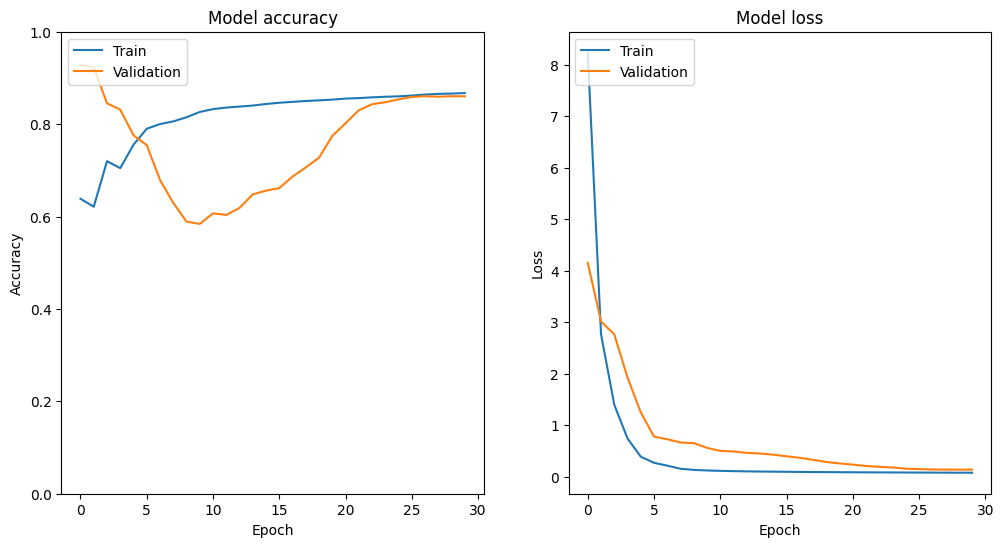

In [6]:
model = cnn_normal()
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid, epoch=30)
plot_history(H)

# Build CNN-BANet-Coordinate model

/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/30
11/11 [==============================] - 41s 3s/step - loss: 0.1639 - binary_accuracy: 0.6379 - val_loss: 0.1340 - val_binary_accuracy: 0.9404 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/30
11/11 [==============================] - 32s 3s/step - loss: 0.1511 - binary_accuracy: 0.7971 - val_loss: 0.1256 - val_binary_accuracy: 0.9404 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/30
11/11 [==============================] - 32s 3s/step - loss: 0.1424 - binary_accuracy: 0.7905 - val_loss: 0.1175 - val_binary_accuracy: 0.9404 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/30
11/11 [==============================] - 32s 3s/step - loss: 0.1355 - binary_accuracy: 0.7911 - val_loss: 0.1065 - val_binary_accuracy: 0.9404 - lr: 5.0000e

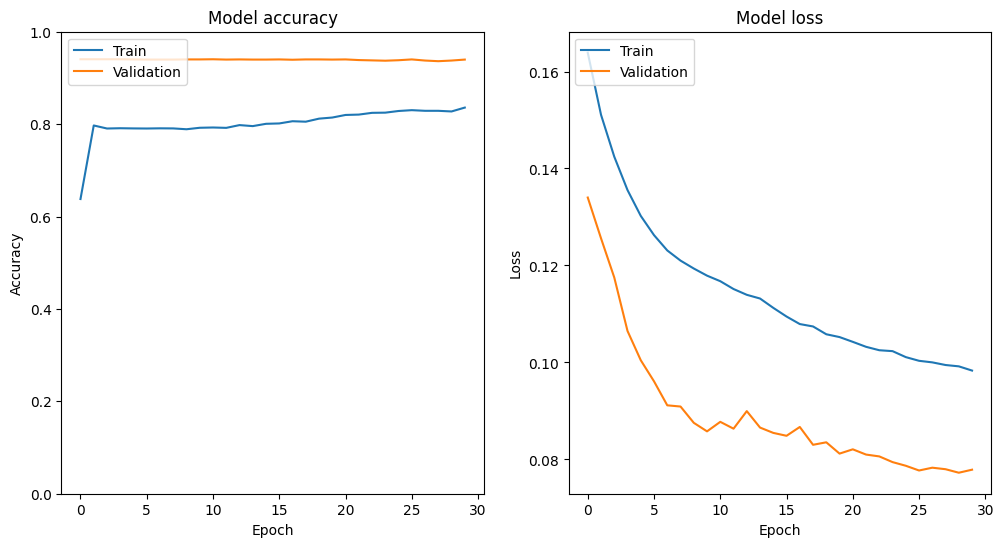

In [7]:
model = build_cnn_banet_model_middle_fusion()
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid, epoch=30)
plot_history(H)

# Build LSTM-BANet-Coordinate model

/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/30
11/11 [==============================] - 75s 3s/step - loss: 0.1711 - binary_accuracy: 0.7690 - val_loss: 0.1665 - val_binary_accuracy: 0.9327 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/30
11/11 [==============================] - 15s 1s/step - loss: 0.1677 - binary_accuracy: 0.7887 - val_loss: 0.1609 - val_binary_accuracy: 0.9352 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/30
11/11 [==============================] - 13s 1s/step - loss: 0.1639 - binary_accuracy: 0.7897 - val_loss: 0.1540 - val_binary_accuracy: 0.9404 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/30
11/11 [==============================] - 12s 1s/step - loss: 0.1592 - binary_accuracy: 0.7899 - val_loss: 0.1451 - val_binary_accuracy: 0.9404 - lr: 5.0000e

/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


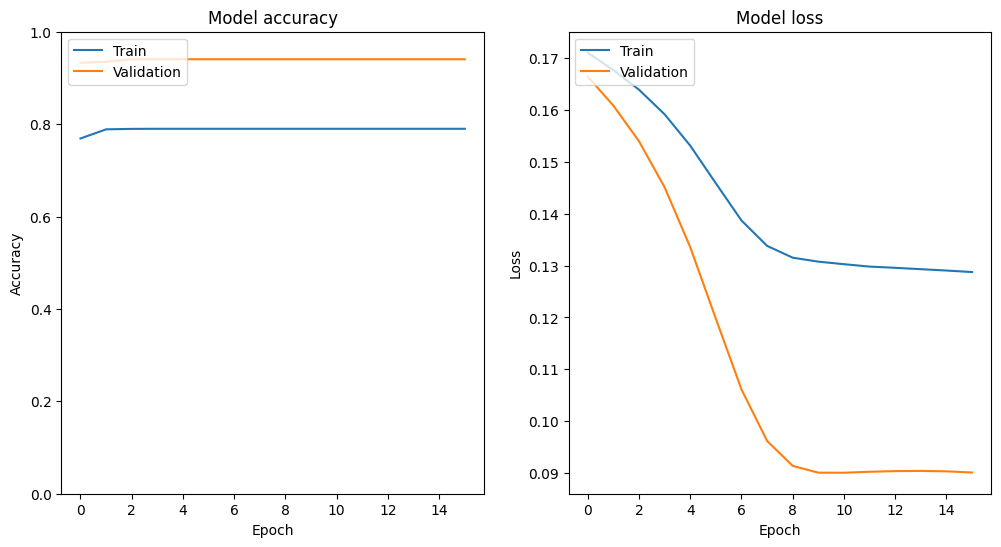

In [8]:
model = build_lstm_banet_model_middle_fusion()
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid, epoch=30)
plot_history(H)